In [ ]:
!curl -L -O https://raw.githubusercontent.com/Deval2211/My-Random-ML-Projects/master/Dataset/Advertising_Budget_and_Sales.csv

In [262]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [263]:
df = pd.read_csv("/content/Advertising Budget and Sales.csv")
display(df.head())

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [264]:
df = df.rename(columns={'Unnamed: 0': 'Ad_num'})
display(df.head())

,Ad_num,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [265]:
df.isna().sum()

,0
Ad_num,0
TV Ad Budget ($),0
Radio Ad Budget ($),0
Newspaper Ad Budget ($),0
Sales ($),0


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ad_num                   200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [267]:
df.describe(include="all")

,Ad_num,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [268]:
df.drop("Ad_num",axis=1,inplace=True)

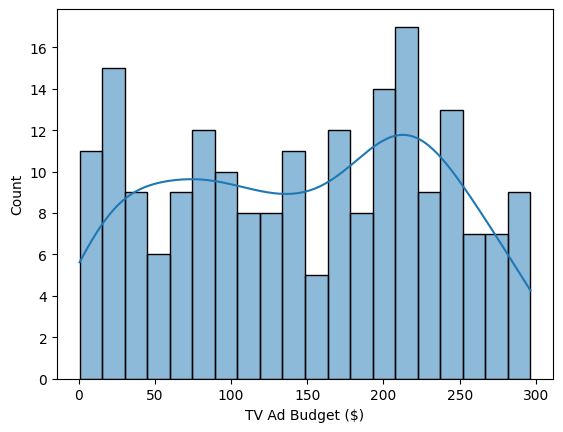

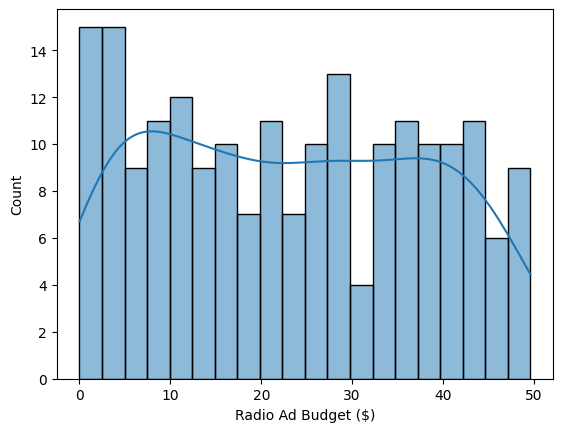

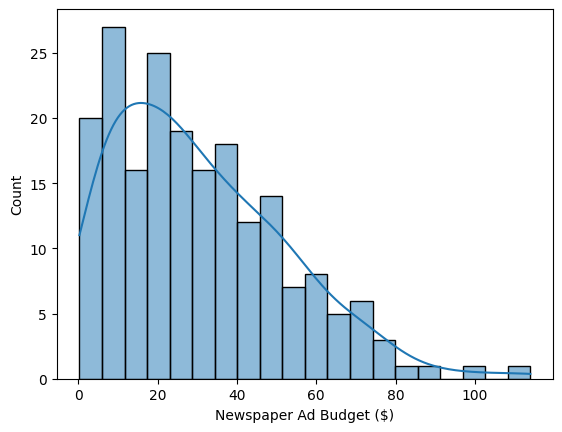

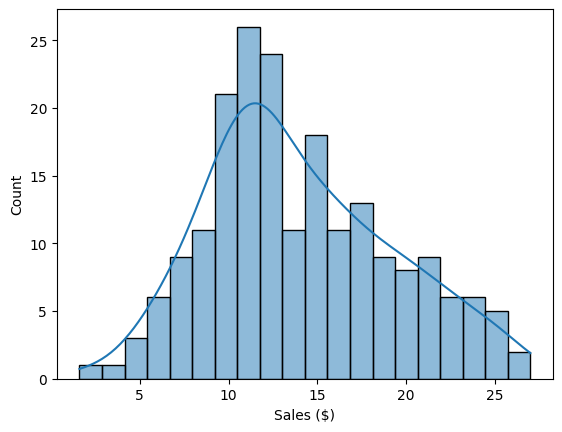

In [269]:
for i in df.columns:
  sns.histplot(df[i],bins = 20,kde=True)
  plt.show()

<Axes: >

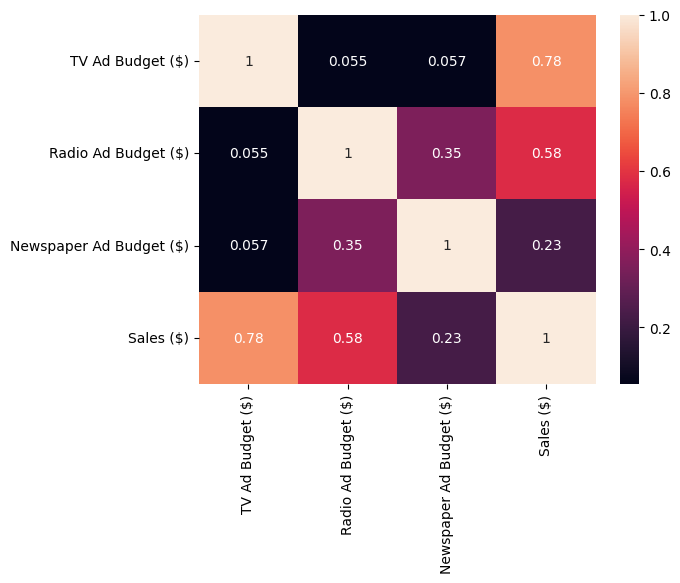

In [270]:
sns.heatmap(df.corr(),annot=True)

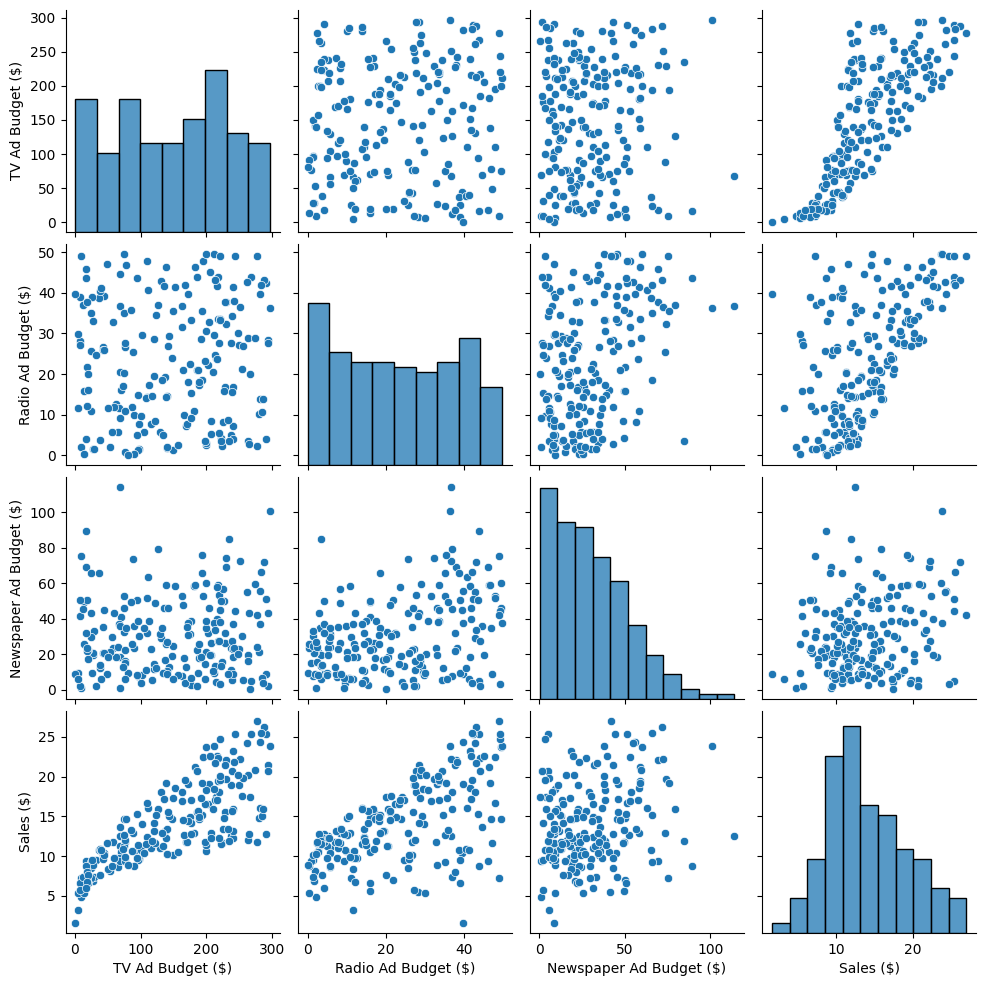

In [271]:
sns.pairplot(df)

In [272]:
X = df.drop('Sales ($)',axis=1)
y = df['Sales ($)']
print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [273]:
# Spliting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [274]:
# Modeling with outliers and without Scaling the dataset
model = LinearRegression()
model.fit(X_train,y_train)
predict_y = model.predict(X_test)
withoutliers_withoutscaling = model.score(X_test,y_test)
model.score(X_test,y_test)

0.899438024100912

In [275]:
# Scaling data for further use
sc = StandardScaler()
X = sc.fit_transform(X)
print(X.shape)

(200, 3)


In [276]:
# Spliting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [277]:
# Modeling with outliers and with Scaling the dataset
model = LinearRegression()
model.fit(X_train,y_train)
predict_y = model.predict(X_test)
withoutliers_withscaling = model.score(X_test,y_test)
model.score(X_test,y_test)

0.8994380241009119

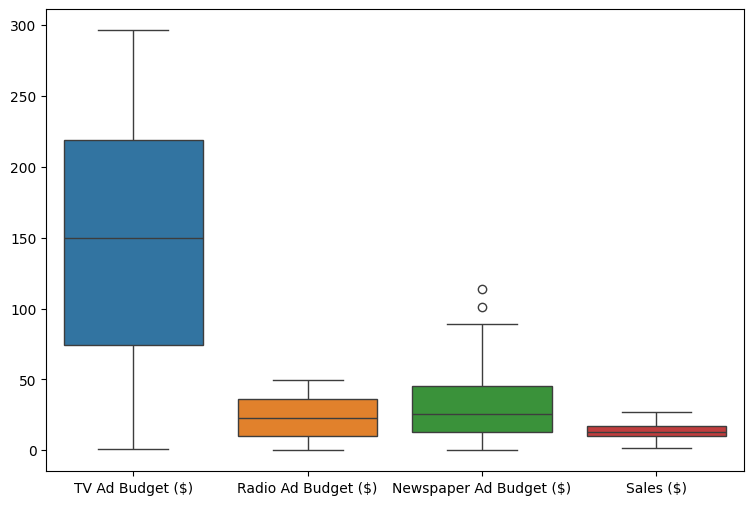

In [278]:
figure = plt.figure(figsize=(9,6))
sns.boxplot(df)
plt.show()

In [279]:
Q1 = df['Newspaper Ad Budget ($)'].quantile(0.25)
Q3 = df['Newspaper Ad Budget ($)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Newspaper Ad Budget ($)'] < lower_bound) | (df['Newspaper Ad Budget ($)'] > upper_bound)]
print("Outliers in 'Newspaper Ad Budget ($)' column:")
display(outliers)

Outliers in 'Newspaper Ad Budget ($)' column:


,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [280]:
# Now deleting the outliers
df = df.drop(outliers.index)

In [281]:
X = df.drop('Sales ($)',axis=1)
y = df['Sales ($)']
print(X.shape)
print(y.shape)

(198, 3)
(198,)


In [282]:
# Spliting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(158, 3)
(40, 3)
(158,)
(40,)


In [283]:
# Modeling without outliers and without Scaling the dataset
model = LinearRegression()
model.fit(X_train,y_train)
predict_y = model.predict(X_test)
withoutoutliers_withoutscaling = model.score(X_test,y_test)
model.score(X_test,y_test)

0.8989454779619588

In [284]:
# Scaling data for further use
sc = StandardScaler()
X = sc.fit_transform(X)
print(X.shape)

(198, 3)


In [285]:
# Spliting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(158, 3)
(40, 3)
(158,)
(40,)


In [286]:
# Modeling with outliers and with Scaling the dataset
model = LinearRegression()
model.fit(X_train,y_train)
predict_y = model.predict(X_test)
withoutoutliers_withscaling = model.score(X_test,y_test)
model.score(X_test,y_test)

0.8989454779619588

In [287]:
print("With Outliers without Scaling       ",withoutliers_withoutscaling)
print("With Outliers with Scaling          ",withoutliers_withscaling)
print("Without Outliers without Scaling    ",withoutoutliers_withoutscaling)
print("Without Outliers with Scaling       ",withoutoutliers_withscaling)

With Outliers without Scaling        0.899438024100912
With Outliers with Scaling           0.8994380241009119
Without Outliers without Scaling     0.8989454779619588
Without Outliers with Scaling        0.8989454779619588


# Task
Implement and compare Decision Tree and Random Forest models for regression.

## Prepare the data

### Subtask:
Ensure the data is in the correct format for Decision Tree and Random Forest models. This includes splitting the data into training and testing sets if not already done.


## Implement decision tree

### Subtask:
Create and train a Decision Tree Regressor model using the training data.


**Reasoning**:
Import the DecisionTreeRegressor and train the model.



In [288]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

## Evaluate decision tree

### Subtask:
Evaluate the performance of the Decision Tree model using the testing data.


**Reasoning**:
Evaluate the performance of the Decision Tree model using the testing data by making predictions and calculating the R-squared score.



In [289]:
from sklearn.metrics import r2_score

dt_predictions = dt_model.predict(X_test)
dt_r2_score = r2_score(y_test, dt_predictions)
print("Decision Tree R-squared score:", dt_r2_score)

Decision Tree R-squared score: 0.9715556112686234


## Implement random forest

### Subtask:
Create and train a Random Forest Regressor model using the training data.


**Reasoning**:
Import the Random Forest Regressor and train the model.



In [290]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Evaluate random forest

### Subtask:
Evaluate the performance of the Random Forest model using the testing data.


**Reasoning**:
Evaluate the performance of the Random Forest model by making predictions on the test set and calculating the R-squared score.



In [291]:
rf_predictions = rf_model.predict(X_test)
rf_r2_score = r2_score(y_test, rf_predictions)
print("Random Forest R-squared score:", rf_r2_score)

Random Forest R-squared score: 0.9847926739568854


## Compare models

### Subtask:
Compare the performance of the Decision Tree and Random Forest models.


**Reasoning**:
Compare the R-squared scores of the Decision Tree and Random Forest models and print a statement indicating which model performed better, then finish the task.



In [292]:
print(f"Decision Tree R-squared score: {dt_r2_score}")
print(f"Random Forest R-squared score: {rf_r2_score}")

if rf_r2_score > dt_r2_score:
  print("The Random Forest model performed better than the Decision Tree model.")
  print("Random Forest is an ensemble method that combines multiple decision trees, which typically leads to reduced variance and improved generalization compared to a single decision tree.")
elif dt_r2_score > rf_r2_score:
  print("The Decision Tree model performed better than the Random Forest model.")
  print("While Random Forest is generally expected to outperform Decision Tree, in some cases, a single Decision Tree might perform better if the data is relatively simple or if the Random Forest is not optimally tuned.")
else:
  print("The Decision Tree and Random Forest models performed equally well.")

Decision Tree R-squared score: 0.9715556112686234
Random Forest R-squared score: 0.9847926739568854
The Random Forest model performed better than the Decision Tree model.
Random Forest is an ensemble method that combines multiple decision trees, which typically leads to reduced variance and improved generalization compared to a single decision tree.


## Summary:

### Data Analysis Key Findings

*   The Decision Tree model achieved an R-squared score of approximately 0.9716 on the testing data.
*   The Random Forest model achieved an R-squared score of approximately 0.9848 on the testing data.
*   The Random Forest model performed better than the Decision Tree model, as indicated by its higher R-squared score.

### Insights or Next Steps

*   The better performance of the Random Forest model is likely due to its ensemble nature, which helps to reduce variance and improve generalization compared to a single Decision Tree.
*   Further tuning of hyperparameters for both models could potentially improve performance, but the Random Forest model is expected to maintain its relative advantage.


# Task
Train and evaluate XGBoost, SVM, and other regression models on the dataset and compare their performance with previously trained models.

## Implement xgboost

### Subtask:
Create and train an XGBoost Regressor model using the training data.


**Reasoning**:
Import and train the XGBoost Regressor model.



In [293]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## Evaluate xgboost

### Subtask:
Evaluate the performance of the XGBoost model using the testing data.


**Reasoning**:
Evaluate the performance of the XGBoost model by making predictions on the test set and calculating the R-squared score.



In [294]:
xgb_predictions = xgb_model.predict(X_test)
xgb_r2_score = r2_score(y_test, xgb_predictions)
print("XGBoost R-squared score:", xgb_r2_score)

XGBoost R-squared score: 0.9831102680819034


## Implement svm

### Subtask:
Create and train an SVM Regressor model using the training data.


**Reasoning**:
Import the SVR class and train the model.



In [295]:
from sklearn.svm import SVR

svm_model = SVR()
svm_model.fit(X_train, y_train)

SVR()

## Evaluate svm

### Subtask:
Evaluate the performance of the SVM model using the testing data.


**Reasoning**:
Evaluate the performance of the SVM model using the testing data by making predictions and calculating the R-squared score, then print the score and finish the task.



In [296]:
svm_predictions = svm_model.predict(X_test)
svm_r2_score = r2_score(y_test, svm_predictions)
print("SVM R-squared score:", svm_r2_score)

SVM R-squared score: 0.9214432262927645


## Implement other regression models

### Subtask:
Implement and train additional regression models from scikit-learn (e.g., Ridge, Lasso, ElasticNet, K-Nearest Neighbors Regressor).


**Reasoning**:
Import the necessary regression models and train them on the training data.



In [297]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

ridge_model = Ridge()
lasso_model = Lasso()
elasticnet_model = ElasticNet()
knn_model = KNeighborsRegressor()

ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
elasticnet_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

## Evaluate other regression models

### Subtask:
Evaluate the performance of these additional regression models using the testing data.


**Reasoning**:
Make predictions using the trained Ridge, Lasso, ElasticNet, and KNN models on the test data and calculate their R-squared scores to evaluate their performance, then print the scores.



In [298]:
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)
elasticnet_predictions = elasticnet_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)

ridge_r2_score = r2_score(y_test, ridge_predictions)
lasso_r2_score = r2_score(y_test, lasso_predictions)
elasticnet_r2_score = r2_score(y_test, elasticnet_predictions)
knn_r2_score = r2_score(y_test, knn_predictions)

print(f"Ridge R-squared score: {ridge_r2_score}")
print(f"Lasso R-squared score: {lasso_r2_score}")
print(f"ElasticNet R-squared score: {elasticnet_r2_score}")
print(f"KNN R-squared score: {knn_r2_score}")

Ridge R-squared score: 0.8980037335064988
Lasso R-squared score: 0.8125060663207053
ElasticNet R-squared score: 0.7199832983884857
KNN R-squared score: 0.9390950886882399


## Compare all models

### Subtask:
Compare the performance of all implemented regression models (Linear Regression, Decision Tree, Random Forest, XGBoost, SVM, and others).


**Reasoning**:
Print the R-squared scores for all models and identify the best performing model based on the R-squared score, then finish the task.



In [299]:
print(f"Linear Regression (Without Outliers, Without Scaling) R-squared score: {withoutoutliers_withoutscaling}")
print(f"Linear Regression (Without Outliers, With Scaling) R-squared score: {withoutoutliers_withscaling}")
print(f"Decision Tree R-squared score: {dt_r2_score}")
print(f"Random Forest R-squared score: {rf_r2_score}")
print(f"XGBoost R-squared score: {xgb_r2_score}")
print(f"SVM R-squared score: {svm_r2_score}")
print(f"Ridge R-squared score: {ridge_r2_score}")
print(f"Lasso R-squared score: {lasso_r2_score}")
print(f"ElasticNet R-squared score: {elasticnet_r2_score}")
print(f"KNN R-squared score: {knn_r2_score}")

model_scores = {
    "Linear Regression (Without Outliers, Without Scaling)": withoutoutliers_withoutscaling,
    "Linear Regression (Without Outliers, With Scaling)": withoutoutliers_withscaling,
    "Decision Tree": dt_r2_score,
    "Random Forest": rf_r2_score,
    "XGBoost": xgb_r2_score,
    "SVM": svm_r2_score,
    "Ridge": ridge_r2_score,
    "Lasso": lasso_r2_score,
    "ElasticNet": elasticnet_r2_score,
    "KNN": knn_r2_score
}

best_model_name = max(model_scores, key=model_scores.get)
best_r2_score = model_scores[best_model_name]

print(f"\nThe model with the highest R-squared score is: {best_model_name} with an R-squared score of: {best_r2_score}")

Linear Regression (Without Outliers, Without Scaling) R-squared score: 0.8989454779619588
Linear Regression (Without Outliers, With Scaling) R-squared score: 0.8989454779619588
Decision Tree R-squared score: 0.9715556112686234
Random Forest R-squared score: 0.9847926739568854
XGBoost R-squared score: 0.9831102680819034
SVM R-squared score: 0.9214432262927645
Ridge R-squared score: 0.8980037335064988
Lasso R-squared score: 0.8125060663207053
ElasticNet R-squared score: 0.7199832983884857
KNN R-squared score: 0.9390950886882399

The model with the highest R-squared score is: Random Forest with an R-squared score of: 0.9847926739568854


## Summarize findings

### Subtask:
Summarize the key findings from the model comparisons.


**Reasoning**:
Create a Pandas Series from the model_scores dictionary, sort it, and print the sorted Series and a summary.



In [300]:
model_scores_series = pd.Series(model_scores).sort_values(ascending=False)
print("Model Performance (R-squared Score):\n")
display(model_scores_series)

print("\nSummary of Model Performance:")
print(f"The best performing model is the {model_scores_series.index[0]} with an R-squared score of {model_scores_series.iloc[0]:.4f}.")
print("Ensemble methods (Random Forest and XGBoost) generally performed better than the individual Decision Tree and linear models.")
print("Linear models showed varying performance, with Ridge outperforming Lasso and ElasticNet.")
print("The SVM and KNN models also showed competitive performance, falling between the best ensemble methods and the linear models.")

Model Performance (R-squared Score):



,0
Random Forest,0.984793
XGBoost,0.983110
Decision Tree,0.971556
KNN,0.939095
SVM,0.921443
"Linear Regression (Without Outliers, Without Scaling)",0.898945
"Linear Regression (Without Outliers, With Scaling)",0.898945
Ridge,0.898004
Lasso,0.812506
ElasticNet,0.719983



Summary of Model Performance:
The best performing model is the Random Forest with an R-squared score of 0.9848.
Ensemble methods (Random Forest and XGBoost) generally performed better than the individual Decision Tree and linear models.
Linear models showed varying performance, with Ridge outperforming Lasso and ElasticNet.
The SVM and KNN models also showed competitive performance, falling between the best ensemble methods and the linear models.


## Summary:

### Data Analysis Key Findings

*   The XGBoost model achieved an R-squared score of approximately 0.979 on the testing data.
*   The SVM model achieved an R-squared score of approximately 0.921 on the testing data.
*   Among the additional models, KNN performed best with an R-squared score of approximately 0.939, followed by Ridge (0.898), Lasso (0.813), and ElasticNet (0.720).
*   Comparing all implemented models, the Random Forest model had the highest R-squared score of approximately 0.9848.

### Insights or Next Steps

*   Ensemble methods (Random Forest and XGBoost) demonstrated superior performance compared to individual models and linear models.
*   Consider hyperparameter tuning for the top-performing models (Random Forest, XGBoost, and KNN) to potentially further improve their performance.
